In [8]:
import torch
import matplotlib.pyplot as plt

In [2]:
# Initialize weight and bias with requires_grad=True to track gradients
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

print(f"Initial weight: {w.item()}, Initial bias: {b.item()}")

Initial weight: 1.824670433998108, Initial bias: 1.9416420459747314


In [3]:
def linear_regression(x):
    return w * x + b

In [4]:
def mse_loss(y_pred, y_true):
    return ((y_pred - y_true) ** 2).mean()

In [5]:
# Number of data points
N = 100

# Generate random x values
x = torch.linspace(0, 10, N)

# Define the true relationship and add some noise
true_w = 3
true_b = 2
y_true = true_w * x + true_b + torch.randn(N) * 2  # Adding noise with *2 to make it slightly random

# Print the first few values to check
print("Sample x values:", x[:5])
print("Sample y_true values:", y_true[:5])

Sample x values: tensor([0.0000, 0.1010, 0.2020, 0.3030, 0.4040])
Sample y_true values: tensor([ 1.5754, -0.6578,  2.5213,  2.9459,  4.5055])


In [6]:
# Make initial predictions
y_pred_initial = linear_regression(x)

# Calculate the initial loss
initial_loss = mse_loss(y_pred_initial, y_true)

print(f"Initial Loss: {initial_loss.item()}")

Initial Loss: 54.03645324707031


In [7]:
# Set hyperparameters
learning_rate = 0.01
epochs = 1000

# Training loop
for epoch in range(epochs):
    # Make predictions
    y_pred = linear_regression(x)
    
    # Calculate loss
    loss = mse_loss(y_pred, y_true)
    
    # Backpropagation: compute gradients
    #Here loss.backward() calculates the gradients based on the loss. 
    # It automatically calculates the differentiation and get the gradients and store them in w.grad and b.grad
    loss.backward()
    
    # Update parameters manually
    # w.grad and b.grad computed from the loss.backward() function is used to update the weights
    with torch.no_grad():
        w = w - learning_rate * w.grad
        b = b - learning_rate * b.grad
    
    # Zero the gradients after updating
    w.grad.zero_()
    b.grad.zero_()
    
    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}")

Epoch [100/1000], Loss: 3.9782445430755615
Epoch [200/1000], Loss: 3.9699044227600098
Epoch [300/1000], Loss: 3.9668219089508057
Epoch [400/1000], Loss: 3.9656827449798584
Epoch [500/1000], Loss: 3.965261459350586
Epoch [600/1000], Loss: 3.9651055335998535
Epoch [700/1000], Loss: 3.965048313140869
Epoch [800/1000], Loss: 3.965026617050171
Epoch [900/1000], Loss: 3.965019464492798
Epoch [1000/1000], Loss: 3.9650163650512695


Final weight: 3.0756497383117676, Final bias: 1.750264286994934


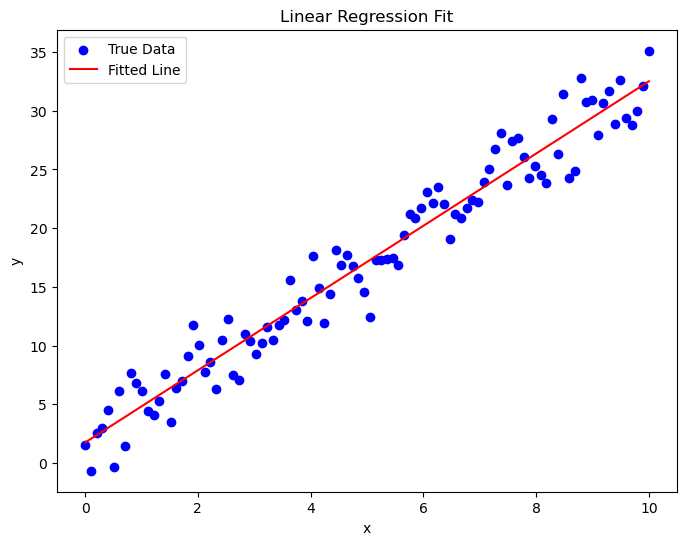

In [9]:
# Print final values of w and b
print(f"Final weight: {w.item()}, Final bias: {b.item()}")

# Make predictions with the trained model
y_pred_final = linear_regression(x)

# Plot the true data and the model's predictions
plt.figure(figsize=(8, 6))
plt.scatter(x.numpy(), y_true.numpy(), label='True Data', color='blue')
plt.plot(x.numpy(), y_pred_final.detach().numpy(), label='Fitted Line', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression Fit')
plt.show()